In [20]:
from src.utils.load_data import load_data
from src.utils.knn_test import knn

# Facenet
print("------FaceNet-------")
train_path = "../data/embeddings/Facenet/train_Facenet_embeddings_id.npz"
test_path = "../data/embeddings/Facenet/test_Facenet_embeddings_id.npz"
x_train, y_train, x_test, y_test = load_data(train_path=train_path, test_path=test_path)
facenet_results = knn(x_train, y_train, x_test, y_test)

# VGG-Face
print("------VGG-Face-------")
train_path = "../data/embeddings/VGG-Face/train_VGG-Face_embeddings_id.npz"
test_path = "../data/embeddings/VGG-Face/test_VGG-Face_embeddings_id.npz"
x_train, y_train, x_test, y_test = load_data(train_path=train_path, test_path=test_path)
vggface_results = knn(x_train, y_train, x_test, y_test)

# SIFT
print("------SIFT-------")
train_path = "../data/embeddings/SIFT/train_SIFT_embeddings_id.npz"
test_path = "../data/embeddings/SIFT/test_SIFT_embeddings_id.npz"
x_train, y_train, x_test, y_test = load_data(train_path=train_path, test_path=test_path)
sift_results = knn(x_train, y_train, x_test, y_test)



------FaceNet-------
x_train: 2104 y_train: 2104
x_test: 553 y_test: 553
x_train_shape: (128,)
x_test_shape: (128,)
------VGG-Face-------
x_train: 2104 y_train: 2104
x_test: 553 y_test: 553
x_train_shape: (2622,)
x_test_shape: (2622,)
------SIFT-------
x_train: 2104 y_train: 2104
x_test: 553 y_test: 553
x_train_shape: (16384,)
x_test_shape: (16384,)


In [34]:
import json
vggface_results_json = json.dumps(vggface_results, indent=4)
print(vggface_results_json)


{
    "1": {
        "accuracy": 0.8716094032549728,
        "precision": 0.8764187339684627,
        "recall": 0.8716094032549728,
        "f1": 0.8688931329189697
    },
    "3": {
        "accuracy": 0.8679927667269439,
        "precision": 0.8806181136997008,
        "recall": 0.8679927667269439,
        "f1": 0.8670974257998865
    },
    "5": {
        "accuracy": 0.8734177215189873,
        "precision": 0.8823442498477069,
        "recall": 0.8734177215189873,
        "f1": 0.8721355092331824
    },
    "7": {
        "accuracy": 0.8679927667269439,
        "precision": 0.8769695993236042,
        "recall": 0.8679927667269439,
        "f1": 0.8660756949710463
    },
    "9": {
        "accuracy": 0.8571428571428571,
        "precision": 0.868871483576946,
        "recall": 0.8571428571428571,
        "f1": 0.8554950574048158
    },
    "11": {
        "accuracy": 0.8625678119349005,
        "precision": 0.8764724583276221,
        "recall": 0.8625678119349005,
        "f1": 0.86

In [32]:
# Tính giá trị cao nhất, thấp nhất và trung bình của mỗi độ đo cho mô hình VGG-Face
for measure in vggface_results[1].keys():
    values = [vggface_results[i][measure] for i in vggface_results.keys()]
    max_value = round(max(values), 3)
    min_value = round(min(values), 3)
    avg_value = round(sum(values) / len(values), 3)
    print(f"VGG-Face - {measure}:\nMax   = {max_value}\nMin   = {min_value}\nAvg   = {avg_value}\n")

# Tính giá trị cao nhất, thấp nhất và trung bình của mỗi độ đo cho mô hình FaceNet
for measure in facenet_results[1].keys():
    values = [facenet_results[i][measure] for i in facenet_results.keys()]
    max_value = round(max(values), 3)
    min_value = round(min(values), 3)
    avg_value = round(sum(values) / len(values), 3)
    print(f"FaceNet - {measure}:\nMax   = {max_value}\nMin   = {min_value}\nAvg   = {avg_value}\n")

# Tính giá trị cao nhất, thấp nhất và trung bình của mỗi độ đo cho mô hình SIFT
for measure in sift_results[1].keys():
    values = [sift_results[i][measure] for i in sift_results.keys()]
    max_value = round(max(values), 3)
    min_value = round(min(values), 3)
    avg_value = round(sum(values) / len(values), 3)
    print(f"SIFT - {measure}:\nMax   = {max_value}\nMin   = {min_value}\nAvg   = {avg_value}\n")


VGG-Face - accuracy:
Max   = 0.873
Min   = 0.857
Avg   = 0.867

VGG-Face - precision:
Max   = 0.882
Min   = 0.869
Avg   = 0.877

VGG-Face - recall:
Max   = 0.873
Min   = 0.857
Avg   = 0.867

VGG-Face - f1:
Max   = 0.872
Min   = 0.855
Avg   = 0.865

FaceNet - accuracy:
Max   = 0.34
Min   = 0.28
Avg   = 0.311

FaceNet - precision:
Max   = 0.415
Min   = 0.33
Avg   = 0.37

FaceNet - recall:
Max   = 0.34
Min   = 0.28
Avg   = 0.311

FaceNet - f1:
Max   = 0.338
Min   = 0.268
Avg   = 0.302

SIFT - accuracy:
Max   = 0.047
Min   = 0.027
Avg   = 0.037

SIFT - precision:
Max   = 0.246
Min   = 0.145
Avg   = 0.195

SIFT - recall:
Max   = 0.047
Min   = 0.027
Avg   = 0.037

SIFT - f1:
Max   = 0.041
Min   = 0.017
Avg   = 0.028



In [22]:
k_values = list(facenet_results.keys())

facenet_accuracies = [facenet_results[k]['accuracy'] for k in k_values]
facenet_precisions = [facenet_results[k]['precision'] for k in k_values]
facenet_recalls = [facenet_results[k]['recall'] for k in k_values]
facenet_f1_scores = [facenet_results[k]['f1'] for k in k_values]

vggface_accuracies = [vggface_results[k]['accuracy'] for k in k_values]
vggface_precisions = [vggface_results[k]['precision'] for k in k_values]
vggface_recalls = [vggface_results[k]['recall'] for k in k_values]
vggface_f1_scores = [vggface_results[k]['f1'] for k in k_values]

sift_accuracies = [sift_results[k]['accuracy'] for k in k_values]
sift_precisions = [sift_results[k]['precision'] for k in k_values]
sift_recalls = [sift_results[k]['recall'] for k in k_values]
sift_f1_scores = [sift_results[k]['f1'] for k in k_values]



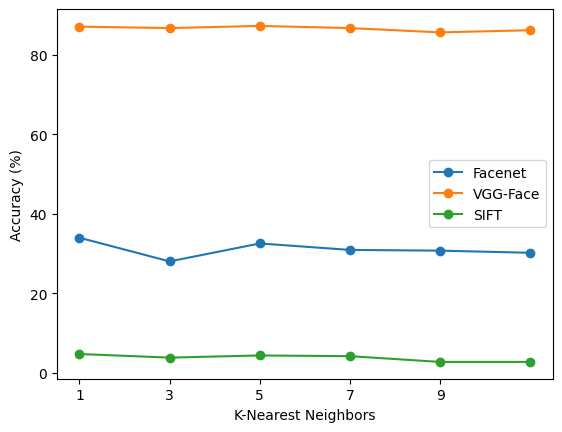

In [23]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(k_values, [acc * 100 for acc in facenet_accuracies], label='Facenet', marker='o')
plt.plot(k_values, [acc * 100 for acc in vggface_accuracies], label='VGG-Face', marker='o')
plt.plot(k_values, [acc * 100 for acc in sift_accuracies], label='SIFT', marker='o')

plt.xlabel("K-Nearest Neighbors")
plt.ylabel('Accuracy (%)')
# plt.title('Độ chính xác của k-NN với SIFT, FaceNet, VGG-Face')

# Sử dụng hàm xticks để chỉ định các giá trị trên trục x
plt.xticks(np.arange(min(k_values), max(k_values), 2.0))
plt.legend()
plt.show()



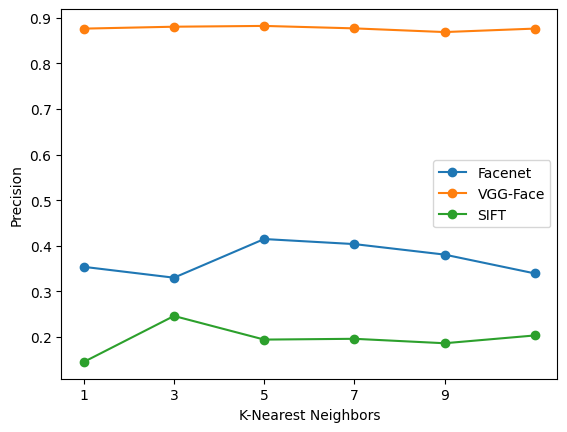

In [26]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(k_values, facenet_precisions, label='Facenet', marker='o')
plt.plot(k_values, vggface_precisions, label='VGG-Face', marker='o')
plt.plot(k_values, sift_precisions, label='SIFT', marker='o')

plt.xlabel("K-Nearest Neighbors")
plt.ylabel('Precision')

# Sử dụng hàm xticks để chỉ định các giá trị trên trục x
plt.xticks(np.arange(min(k_values), max(k_values), 2.0))
plt.legend()
plt.show()



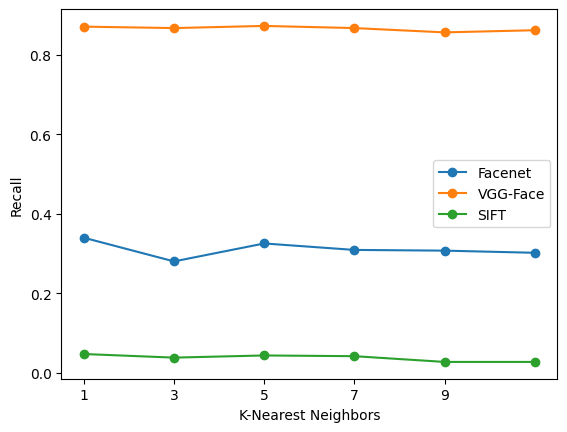

In [27]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(k_values, facenet_recalls, label='Facenet', marker='o')
plt.plot(k_values, vggface_recalls, label='VGG-Face', marker='o')
plt.plot(k_values, sift_recalls, label='SIFT', marker='o')

plt.xlabel("K-Nearest Neighbors")
plt.ylabel('Recall')

# Sử dụng hàm xticks để chỉ định các giá trị trên trục x
plt.xticks(np.arange(min(k_values), max(k_values), 2.0))
plt.legend()
plt.show()



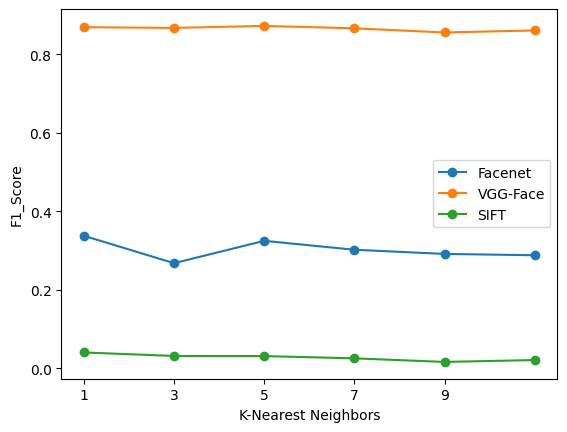

In [28]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(k_values, facenet_f1_scores, label='Facenet', marker='o')
plt.plot(k_values, vggface_f1_scores, label='VGG-Face', marker='o')
plt.plot(k_values, sift_f1_scores, label='SIFT', marker='o')

plt.xlabel("K-Nearest Neighbors")
plt.ylabel('F1_Score')

# Sử dụng hàm xticks để chỉ định các giá trị trên trục x
plt.xticks(np.arange(min(k_values), max(k_values), 2.0))
plt.legend()
plt.show()



THỬ NGHIỆM _ GIẢM SỐ CHIỀU VECTOR VGG-FACE

In [4]:
#VGG-Face giảm số chiều 2622 -> 128
from sklearn.decomposition import PCA

train_path = "../data/embeddings/VGG-Face/train_VGG-Face_embeddings_id.npz"
test_path = "../data/embeddings/VGG-Face/test_VGG-Face_embeddings_id.npz"

x_train, y_train, x_test, y_test = load_data(train_path=train_path, test_path=test_path)

# Khởi tạo PCA với n_components=128
pca = PCA(n_components=128)

# Thực hiện giảm số chiều
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

results = knn(x_train, y_train, x_test, y_test)

for k, metrics in results.items():
    print(
        f"k = {k:2d}:  Accuracy: {metrics['accuracy']:.4f}  Precision: {metrics['precision']:.4f}  Recall: {metrics['recall']:.4f}  F1-score: {metrics['f1']:.4f}")

x_train: 2104 y_train: 2104
x_test: 553 y_test: 553
x_train_shape: (2622,)
x_test_shape: (2622,)
k =  1:  Accuracy: 0.1772  Precision: 0.1927  Recall: 0.1772  F1-score: 0.1701
k =  3:  Accuracy: 0.1609  Precision: 0.1750  Recall: 0.1609  F1-score: 0.1491
k =  5:  Accuracy: 0.1754  Precision: 0.1681  Recall: 0.1754  F1-score: 0.1641
k =  7:  Accuracy: 0.1917  Precision: 0.1876  Recall: 0.1917  F1-score: 0.1775
k =  9:  Accuracy: 0.2007  Precision: 0.1920  Recall: 0.2007  F1-score: 0.1820
k = 11:  Accuracy: 0.2098  Precision: 0.2075  Recall: 0.2098  F1-score: 0.1908


In [2]:
from src.utils.load_data import load_data
from src.utils.knn_test import knn


train_path = "../data/embeddings/VGG-Face/train_VGG-Face_embeddings_id.npz"
test_path = "../data/embeddings/VGG-Face/test_VGG-Face_embeddings_id.npz"

x_train, y_train, x_test, y_test = load_data(train_path=train_path, test_path=test_path)

results = knn(x_train, y_train, x_test, y_test, k_num=5)

for k, metrics in results.items():
    print(
        f"k = {k:2d}:  Accuracy: {metrics['accuracy']:.4f}  Precision: {metrics['precision']:.4f}  Recall: {metrics['recall']:.4f}  F1-score: {metrics['f1']:.4f}")

x_train: 2104 y_train: 2104
x_test: 553 y_test: 553
x_train_shape: (2622,)
x_test_shape: (2622,)
k =  5:  Accuracy: 0.8734  Precision: 0.8823  Recall: 0.8734  F1-score: 0.8721
